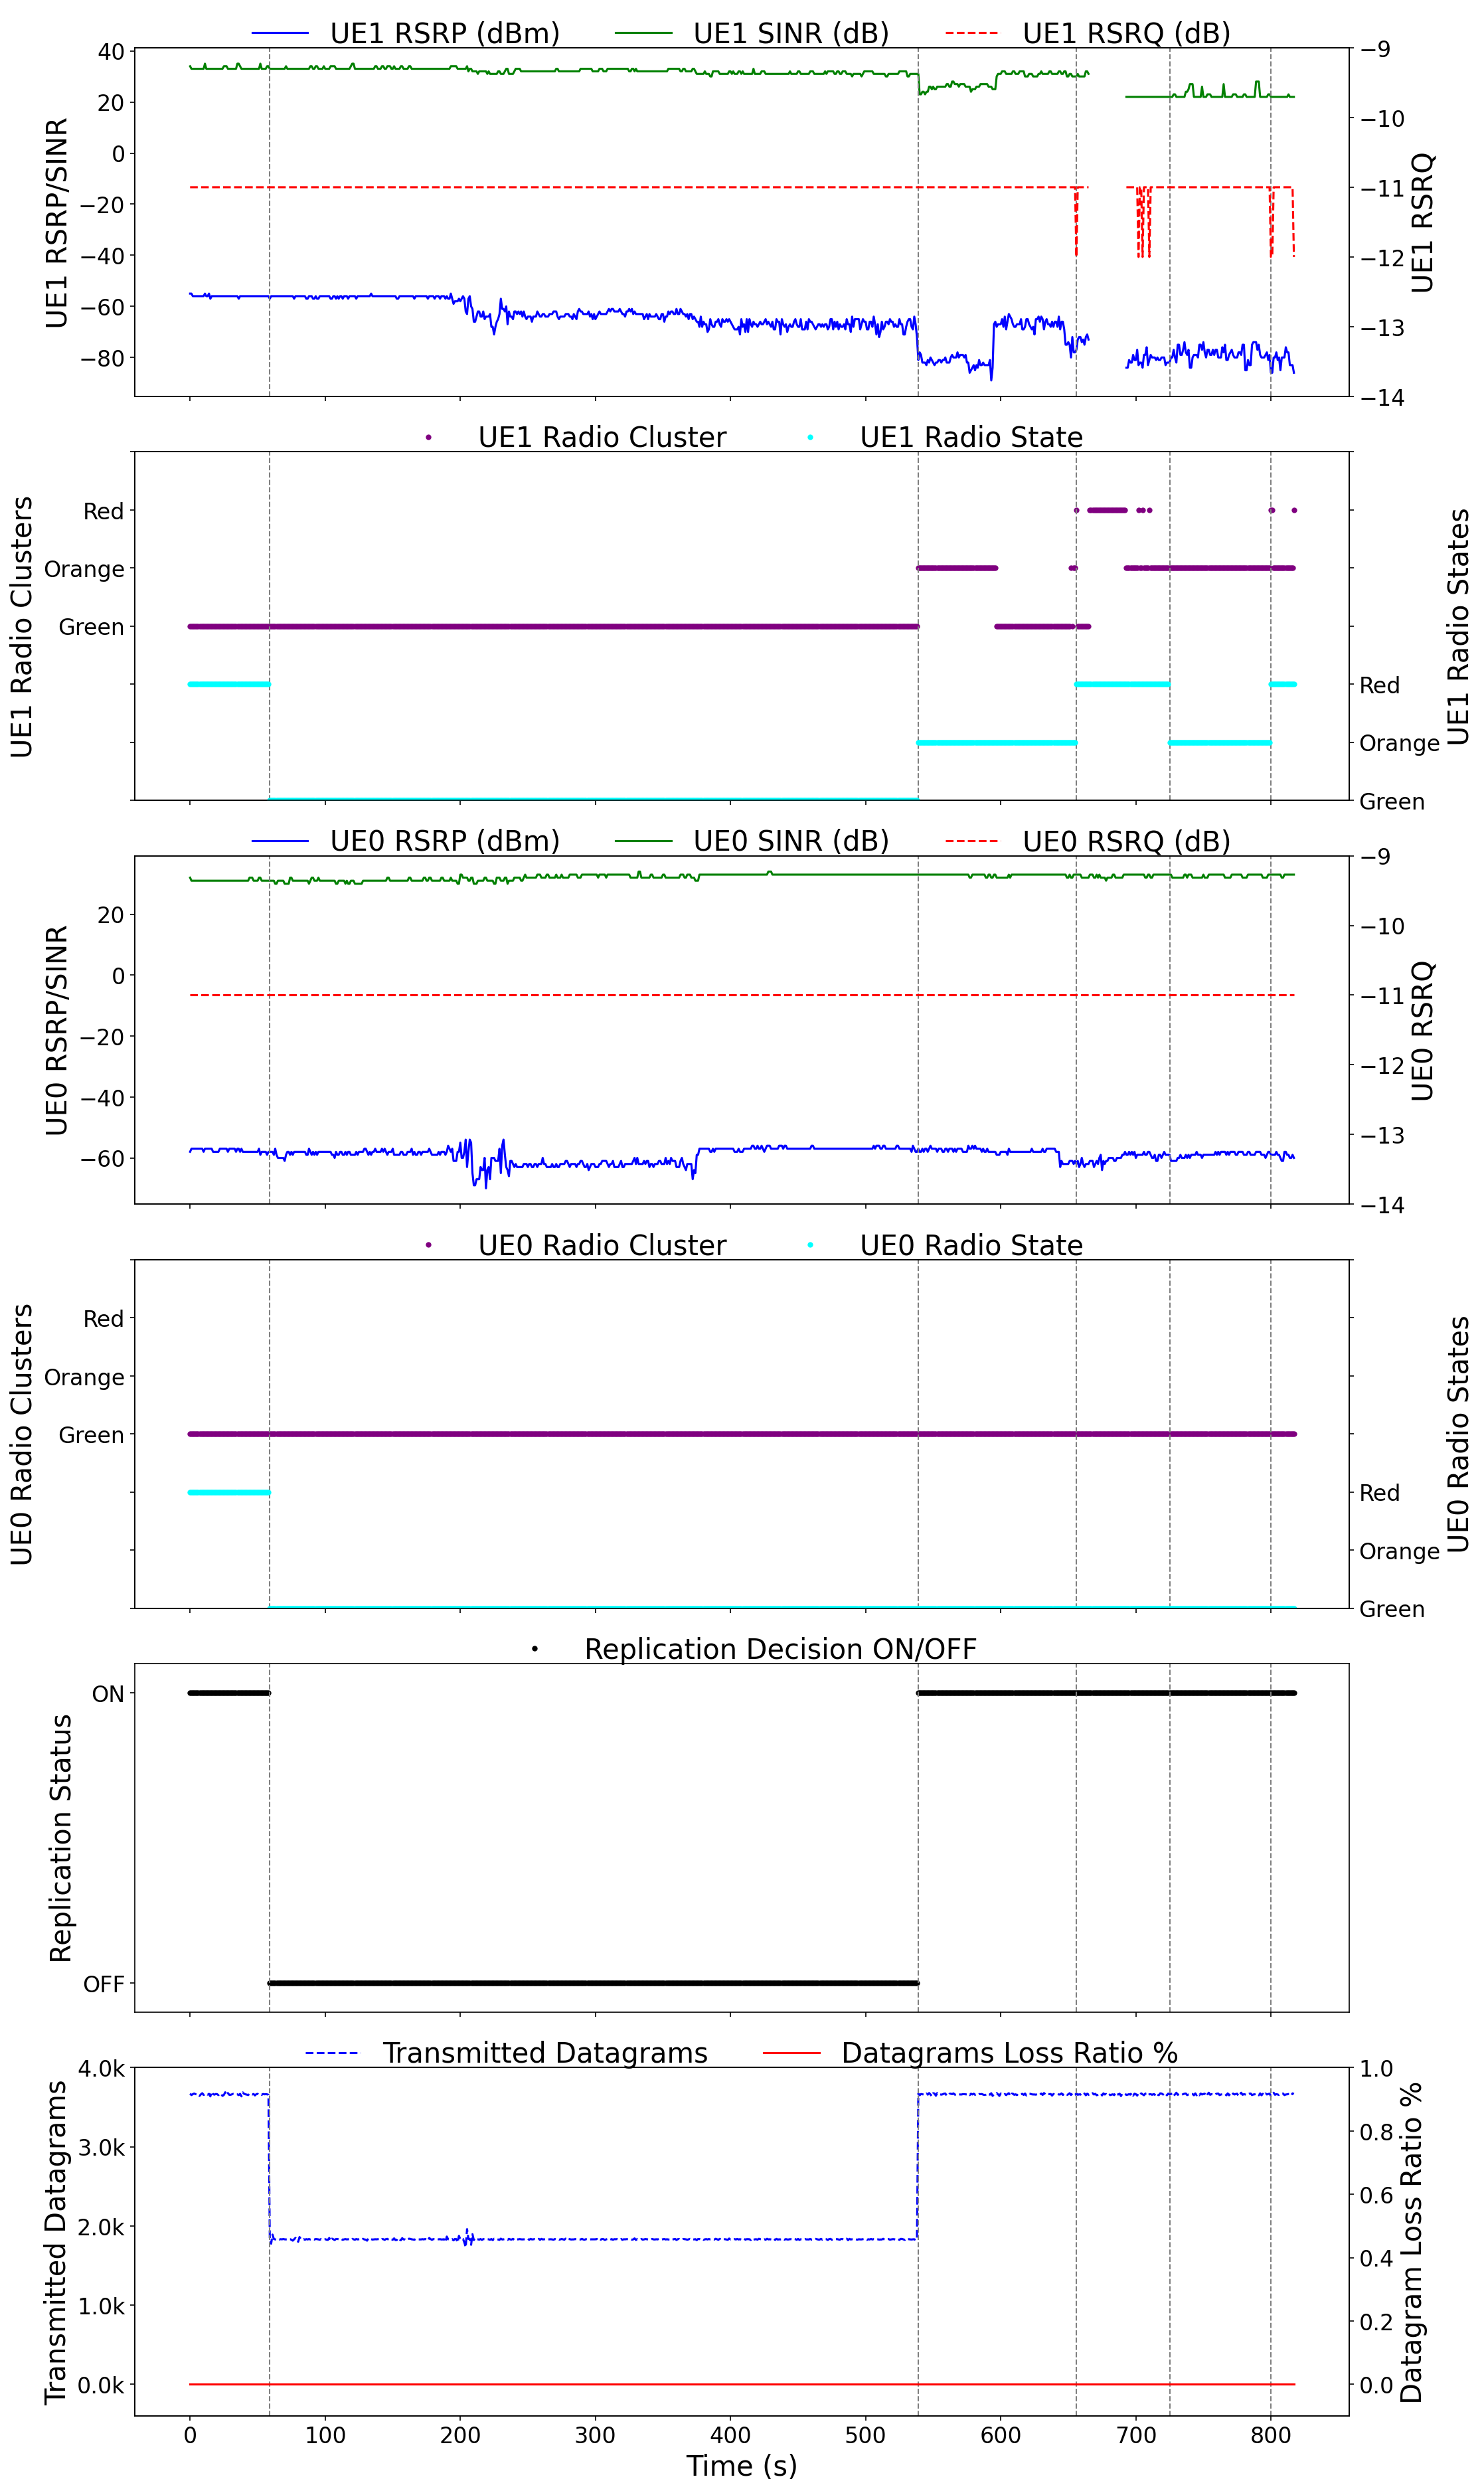

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the CSV file
df = pd.read_csv('ml-FRER-vis.csv')

# Function to format the tick labels in thousands
def thousands_formatter(x, pos):
    return f'{x / 1000}k'


# Function to add legend below each subplot
def add_legend(ax, ax2):
    # Collect handles and labels for both axes
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2
    # Place the combined legend in the middle below the subplot
    ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=20)








# Increase the subplot size to accommodate the new cluster info plots
fig, axs = plt.subplots(6, 1, figsize=(15, 25), sharex=True, dpi=150)




# UE1 Radio Conditions with <RSRQ> on secondary Y axis
ax1 = axs[0]
ax1_rsrq = ax1.twinx()
ax1.plot(df.index, df['UE1<RSRP>'], label='UE1 RSRP (dBm)', color='blue')
ax1.plot(df.index, df['UE1<SINR>'], label='UE1 SINR (dB)', color='green')

ax1.set_ylabel('UE1 RSRP/SINR', fontsize=20)
ax1_rsrq.plot(df.index, df['UE1<RSRQ>'], label='UE1 RSRQ (dB)', color='red', linestyle='--')

ax1_rsrq.set_ylabel('UE1 RSRQ', color='black', fontsize=20)
ax1_rsrq.set_ylim(-14,-9)
add_legend(ax1, ax1_rsrq)



# Plotting UE1 Cluster Info
axs[1].plot(df.index, df['UE1-Cluster'], label='UE1 Radio Cluster', color='purple', marker='.', linestyle='None')
axs[1].set_ylabel('UE1 Radio Clusters', fontsize=20)
axs[1].set_ylim(-3, 3)  # Adjust to include all cluster values
axs[1].set_yticks([-3, -2, -1 , 0 , 1, 2, 3])  # Set y-ticks to correspond to the binary values
axs[1].set_yticklabels(['', '', '', 'Green', 'Orange', 'Red', ''])  # Replace 0 with 'OFF' and 1 with 'ON'

# Create a secondary y-axis for UE1-Cluster-Hist on the same subplot as UE1 Cluster
ax1_cluster_hist = axs[1].twinx()
ax1_cluster_hist.plot(df.index, df['UE1-Cluster-Hist'], label='UE1 Radio State', color='cyan', marker='.', linestyle='None')
ax1_cluster_hist.set_ylabel('UE1 Radio States', color='black', fontsize=20)
ax1_cluster_hist.set_ylim(0, 6)  # Assuming the cluster history values are similar to cluster values
# Replace numerical y-axis labels with text
ax1_cluster_hist.set_yticks([0, 1, 2, 3, 4, 5, 6])  # Set y-ticks to correspond to the binary values
ax1_cluster_hist.set_yticklabels(['Green', 'Orange', 'Red', '', '', '', ''])  



add_legend(axs[1], ax1_cluster_hist)


# UE0 Radio Conditions and Cluster with <RSRQ> on secondary Y axis
ax2 = axs[2]
ax2_rsrq = ax2.twinx()
ax2.plot(df.index, df['UE0<RSRP>'], label='UE0 RSRP (dBm)', color='blue')
ax2.plot(df.index, df['UE0<SINR>'], label='UE0 SINR (dB)', color='green')
ax2_rsrq.plot(df.index, df['UE0<RSRQ>'], label='UE0 RSRQ (dB)', color='red', linestyle='--')
ax2.set_ylabel('UE0 RSRP/SINR', fontsize=20)
ax2_rsrq.set_ylabel('UE0 RSRQ', color='black', fontsize=20)
ax2_rsrq.set_ylim(-14,-9)
add_legend(ax2, ax2_rsrq)


# Plotting UE0 Cluster Info
# UE0 Cluster Info with UE0-Cluster-Hist on secondary Y axis
ax3 = axs[3]
ax3_hist = ax3.twinx()
ax3.plot(df.index, df['UE0-Cluster'], label='UE0 Radio Cluster', color='purple', marker='.', linestyle='None')
ax3_hist.plot(df.index, df['UE0-Cluster-Hist'], label='UE0 Radio State', color='cyan', marker='.', linestyle='None')
ax3.set_ylabel('UE0 Radio Clusters', fontsize=20)
ax3.set_ylim(-3, 3)  # Adjust to include all cluster values

# Replace numerical y-axis labels with text
ax3.set_yticks([-3, -2, -1 , 0 , 1, 2, 3])  # Set y-ticks to correspond to the binary values
ax3.set_yticklabels(['', '', '', 'Green', 'Orange', 'Red', ''])  # Replace 0 with 'OFF' and 1 with 'ON'


ax3_hist.set_ylabel('UE0 Radio States', color='black', fontsize=20)
ax3_hist.set_ylim(0, 6)  # Assuming the cluster history values are similar to cluster values

# Replace numerical y-axis labels with text
ax3_hist.set_yticks([0, 1, 2, 3, 4, 5, 6])  # Set y-ticks to correspond to the binary values
ax3_hist.set_yticklabels(['Green', 'Orange', 'Red', '', '', '', ''])  


add_legend(ax3, ax3_hist)






# # Assuming FRER Replication Status and Datagram Loss Ratio plots remain the same,
# # FRER Replication Status
ax3 = axs[4]
ax3.step(df.index, df['Replication ON/OFF'], label='Replication Decision ON/OFF', where='post', color='black', marker='.', linestyle='None')
ax3.set_ylabel('Replication Status', fontsize=20)
ax3.set_ylim(-0.1, 1.1)  # Adjusting y limits for clarity
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=20)
# Replace numerical y-axis labels with text
ax3.set_yticks([0, 1])  # Set y-ticks to correspond to the binary values
ax3.set_yticklabels(['OFF', 'ON'])  # Replace 0 with 'OFF' and 1 with 'ON'






# Datagram Loss Ratio now plotted on secondary Y axis, and Transmitted Datagrams on the primary Y axis
ax4 = axs[5]  # Primary axis for Transmitted Datagrams
ax4_loss_ratio = ax4.twinx()  # New secondary y-axis for Datagram Loss Ratio %

# Plot Transmitted Datagrams on the primary Y axis, applying the formatter for thousands
ax4.plot(df.index, df['Transmitted Datagrams'], label='Transmitted Datagrams', color='blue', linestyle='--')
ax4.set_ylabel('Transmitted Datagrams', color='black', fontsize=20)
ax4.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax4.set_ylim(-400, 4000)  # Adjust as necessary


# Plot Datagram Loss Ratio % on the secondary Y axis
ax4_loss_ratio.plot(df.index, df['Datagrams Loss Ratio %'], label='Datagrams Loss Ratio %', color='red')
ax4_loss_ratio.set_ylabel('Datagram Loss Ratio %', color='black', fontsize=20)
ax4_loss_ratio.set_ylim(-0.1, 1)

# Set x-axis label
ax4.set_xlabel('Time (s)',fontsize=20)

# Assuming add_legend function is adapted to work with the swapped axes
add_legend(ax4, ax4_loss_ratio)










# Define a list of x-coordinates for the vertical lines
x_indices = [59, 539, 656, 725, 800]  # Example indices, adjust to your needs

# Add vertical lines at specified x-coordinates on all subplots
for ax in axs:
    # Iterate over each specified x-coordinate
    for x_index in x_indices:
        ax.axvline(x=x_index, color='gray', linestyle='--', linewidth=1)
    # If the subplot has a twin y-axis, add the line there as well
    if hasattr(ax, 'twinx_ax'):  # Assuming you've attached twin axes as a custom attribute
        for x_index in x_indices:
            ax.twinx_ax.axvline(x=x_index, color='gray', linestyle='--', linewidth=1)

# Set the desired font size for tick labels
font_size = 16  # Example font size, adjust as needed

# Increase font size of the numbers on the y and x axes for all primary subplots
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=font_size)

# Explicitly set font size for secondary y-axes created with twinx()
for ax_twin in [ax1_rsrq, ax2_rsrq, ax1_cluster_hist, ax3_hist, ax4_loss_ratio]:
    ax_twin.tick_params(axis='y', which='major', labelsize=font_size)



#plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust the overall layout
plt.subplots_adjust(hspace=0.2)  # Adjust space between subplots if necessary

plt.tight_layout()
plt.savefig("AIO_figure.pdf")

plt.show()

